In [1]:
#######################
##  Library Imports  ##
#######################
import numpy as np
import h5py
import sys
import os
from numba import njit
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif']  = 'Computer Modern Roman'
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import getopt
from itertools import zip_longest
import multiprocessing as mprocs
import time as TIME
from subprocess import Popen, PIPE
from matplotlib.pyplot import cm
from functions import tc, import_data, sim_data, import_data, import_spectra_data, import_post_processing_data

In [6]:
in_dir = "/work/projects/TurbPhase/Phase_Dynamics_Navier_Stokes/2D_NavierStokes/Data/Working/SIM_DATA_NAVIER_RK4_FULL_N[1024,1024]_T[0-200]_NU[0.000000]_CFL[0.80]_u0[DECAY_TURB]_TAG[Stoch-Hyper-Long]/"
post_file_path = in_dir + "PostProcessing_HDF_Data_SECTORS[40]_KFRAC[1.00]_TAG[NO-TAG].h5"

In [7]:
# -----------------------------------------
# # --------  Read In data
# -----------------------------------------
## Read in simulation parameters
sys_vars = sim_data(in_dir)

## Read in solver data
run_data = import_data(in_dir, sys_vars)

## Read in spectra data
spec_data = import_spectra_data(in_dir, sys_vars)

## Read in post processing data
post_data = import_post_processing_data(post_file_path, sys_vars, 'file')


Preparing real space vorticity... Finished!

Preparing real space vorticity... Finished!


In [15]:
def saddle_field(w_h):
    
    h_x  = 1j * run_data.kx[:, np.newaxis] * w_h
    h_xx =  -(run_data.kx[:, np.newaxis]**2) * w_h #1j * run_data.kx[:, np.newaxis] * h_x
    h_y  = 1j * run_data.ky * w_h
    h_yy = -(run_data.ky**2) * w_h
    h_xy = -run_data.ky * run_data.kx[:, np.newaxis] * w_h
    
    h = np.fft.irfft2(h_xx) * np.fft.irfft2(h_yy) - np.fft.irfft2(h_xy)**2
    
    return -h / np.absolute(np.fft.irfft2(h_x)**2 + np.fft.irfft2(h_y)**2)

def u_x(w_h):
    return np.fft.irfft2(1j * run_data.ky * run_data.k2Inv * w_h)

def u_y(w_h):
    return np.fft.irfft2(-1j * run_data.kx[:, np.newaxis] * run_data.k2Inv * w_h)

In [16]:
t = -1

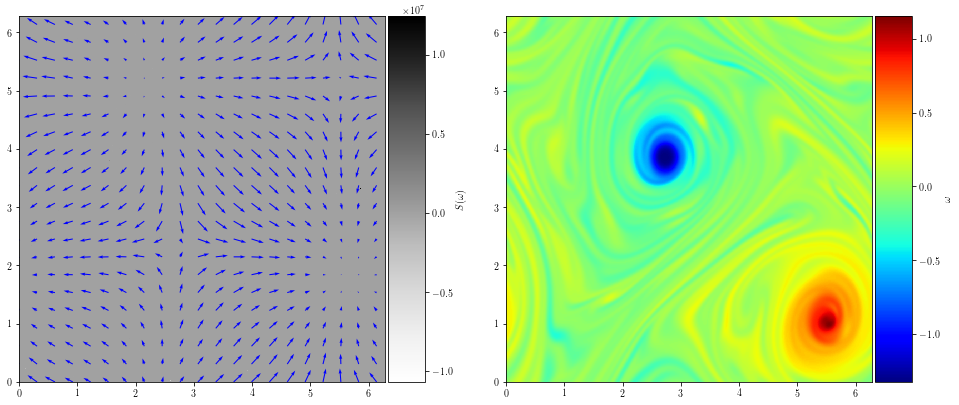

In [24]:
fig = plt.figure(figsize = (16, 16))
gs  = GridSpec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
im1 = ax1.imshow(saddle_field(run_data.w_hat[t, :, :]), extent = [run_data.x[0], run_data.x[-1], run_data.y[0], run_data.y[-1]], cmap = 'Greys')
# ax1.quiver(run_data.x, run_data.y, run_data.u[t, :, :, 0], run_data.u[t, :, :, 1], color = 'blue')
skip = 50
ax1.quiver(run_data.x[::skip], run_data.y[::skip], u_x(run_data.w_hat[t, :, :])[::skip, ::skip], u_y(run_data.w_hat[t, :, :])[::skip, ::skip], color = 'blue')
div1  = make_axes_locatable(ax1)
cbax1 = div1.append_axes("right", size = "10%", pad = 0.05)
cb1   = plt.colorbar(im1, cax = cbax1)
cb1.set_label(r"$S(\omega)$")
ax2 = fig.add_subplot(gs[0, 1])
im2 = ax2.imshow(run_data.w[t, :, :], extent = [run_data.x[0], run_data.x[-1], run_data.y[0], run_data.y[-1]], cmap = 'jet')
div2  = make_axes_locatable(ax2)
cbax2 = div2.append_axes("right", size = "10%", pad = 0.05)
cb2   = plt.colorbar(im2, cax = cbax2)
cb2.set_label(r"$\omega$")
plt.show()

In [22]:
for i in range(run_data.w_hat.shape[1]):
    for j in range(run_data.w_hat.shape[2]):
        r1 = np.random.normal()
        r2 = np.random.normal()
        
        forcing.append(np.complex(0.0, 0.0))

SyntaxError: unexpected EOF while parsing (<ipython-input-22-631fd4ab9ace>, line 2)